Classification and Regression

## Linear Regression

If we have a data set with two variables that depend on each other, then with the help of linear regression we can make a predictive model. We try to find a causal relationship between two variables, one of which depends on a number of independent variables. We will use a dataset that describes heights and weights of men and women.

Let's first set up the notebook by importing the components we will use in our code:

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from graphviz import Source
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

To read the dataset, run the following code cell:

In [3]:
body_stats = pd.read_csv("weight-height.csv")
body_stats.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


This dataset is actually in Imperial units with height measured in inches and weight measured in pounds. Let's first changes this to metric values! Run the following cell that will do just that:

In [4]:
body_stats.Height = body_stats.Height.apply(lambda x: x * 2.54)
body_stats.Weight = body_stats.Weight.apply(lambda x: x / 2.2046)
body_stats

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


Now we can see the dataset shape and what the data points look like, let's get a feel of how data looks by visualizing it. Run the next code cell to create a scatterplot of the data:

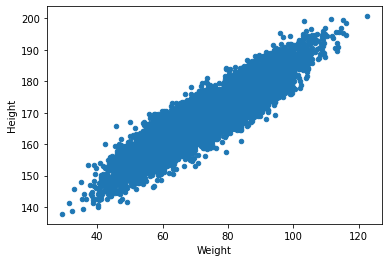

In [5]:
_ = body_stats.plot.scatter(x='Weight', y='Height')

One way that we can distinguish between distinct groups that we know about is to colour them differently in our plots. Run the next cell to create the same scatterplot but with male and female data distinguished by colour.

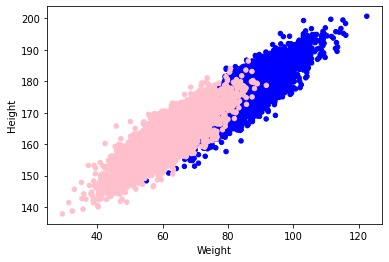

In [6]:
cmap = {'Male': 'blue', 'Female': 'pink'}
_ = body_stats.plot.scatter(x='Weight', y='Height', c=[cmap.get(c) for c in body_stats.Gender])

Now let's look at each category of data in isolation:

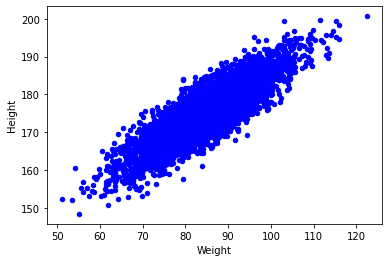

In [7]:
male_stats = body_stats[body_stats.Gender == 'Male']
_ = male_stats.plot.scatter(x='Weight', y='Height', c='blue')

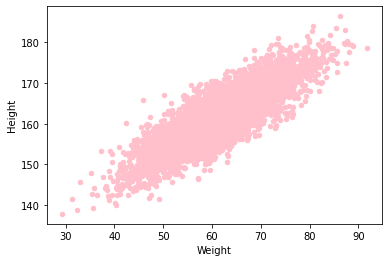

In [8]:
female_stats = body_stats[body_stats.Gender == 'Female']
_ = female_stats.plot.scatter(x='Weight', y='Height', c='pink')

The reason we use linear regression is to find the right line that lies as close to all the points as possible to allow us to enter, for example, a height and then be able to infer the height (make a prediction). As you can see in the scatterplots, the data is a bit more spread out and it actually quite difficult to manually fit the right line $y = ax + b$ to represent linear relationship.

Luckily, we can use the `LinerarRegression` model from the `sklearn` Python package to build a linear regression model. First we fit the data. This trains the model based on the two variables, in this case `male_stats.Weight` and `male_stats.Height`:

In [9]:
lm_male = linear_model.LinearRegression()
lm_male.fit([[x] for x in male_stats.Weight], male_stats.Height)
m = lm_male.coef_[0]
b = lm_male.intercept_
print("slope=", m, "intercept=", b)

slope= 0.6995009803642653 intercept= 115.98685351119101


To see how the linear model we trained on the male weight and height data, we can plot the linear relationship over our scattergraph we created earlier using the slope and intercept we extracted from our linear model `lm_male`: 

Text(0, 0.5, 'Height')

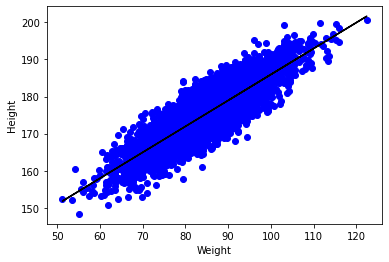

In [10]:
plt.scatter(x=male_stats.Weight, y=male_stats.Height, c='blue')
predicted_values_m = [lm_male.coef_ * i + lm_male.intercept_ for i in male_stats.Weight]
plt.plot(male_stats.Weight, predicted_values_m, 'black')
plt.xlabel("Weight")
plt.ylabel("Height")

Run the next two cells to do the same for the female weight and height data:

In [11]:
lm_female = linear_model.LinearRegression()
lm_female.fit([[x] for x in female_stats.Weight], female_stats.Height)
m = lm_female.coef_[0]
b = lm_female.intercept_
print("slope=", m, "intercept=", b)

slope= 0.6743435291991435 intercept= 120.26337004932488


Text(0.5, 0, 'Weight')

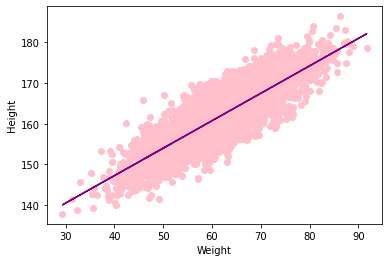

In [12]:
plt.scatter(female_stats.Weight, female_stats.Height, c='pink')
predicted_values_f = [lm_female.coef_ * i + lm_female.intercept_ for i in female_stats.Weight]
plt.plot(female_stats.Weight, predicted_values_f, 'purple')
plt.ylabel("Height")
plt.xlabel("Weight")

Finally, let's visualize both together:

Text(0, 0.5, 'Height')

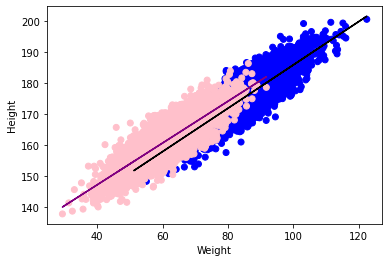

In [13]:
plt.scatter(body_stats.Weight, body_stats.Height, c=[cmap.get(c) for c in body_stats.Gender])
plt.plot(male_stats.Weight, predicted_values_m, 'black')
plt.plot(female_stats.Weight, predicted_values_f, 'purple')
plt.xlabel("Weight")
plt.ylabel("Height")

We can also calculate some measurement for investigating the accuracy of the model. Common such measures are RMSE and R^2

In [14]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean absolute error " + str(mean_absolute_error(male_stats.Height, predicted_values_m)))
print("mse " + str(mean_squared_error(male_stats.Height, predicted_values_m, multioutput='uniform_average', squared=False)))
print("rmse " + str(mean_squared_error(male_stats.Height, predicted_values_m, multioutput='uniform_average', squared=True)))
# The coefficient of determination: 1 is perfect prediction
print("r^2 score "  + str(r2_score(male_stats.Height, predicted_values_m)))

mean absolute error 2.946181237530269
mse 3.674213114295326
rmse 13.49984200925976
r^2 score 0.744732493159145


Apart from plotting the fitted linear relationship over the scatterplot, our linear regression model also provides us with a function `predict()` that can take an input variable and output a prediction. For example, assuming a fitted linear model named `my_linear_model` we might use the code:

    my_linear_model.predict([[64.7]])
    
to find out how tall a person of the weight 64.7kg, in cm. 

Based on your linear models for male and female data, what are the predicted heights for a male weighing 80.6kg (the average weight of a man in Sweden) and a female weighing 64.7 kg (the average weight for a woman in Sweden)? Provide your answers to a minimum of 2 decimal places.

Write your own code in each of the two following cells to calculate this using the linear models.

In [15]:
lm_male.predict([[80.6]])

array([172.36663253])

In [16]:
lm_female.predict([[64.7]])

array([163.89339639])

What happens if we want to predict how tall a man that weights 350 kg is? Let´s try

In [17]:
lm_male.predict([[350]])

array([360.81219664])

Take away: Regression tends to have a range where the predicitions are corret, outside of this range, the result can be erronenous. You need to know your data!

## Classification

Next, we will explore classification by looking at a dataset relating to the demographics of the survivors of the Titantic disaster. If you are not familiar with the Titanic, you could watch the film but it is more than 3 hours long, so do not watch it during this lab. In this lab we will use a decision tree as a predictive model to predict if a person with particular features might have lived or died on the Titanic.

First, we load the dataset:

In [19]:
titantic_passengers = pd.read_csv("titanic.csv")
titantic_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1st,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,1st,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,1st,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,1st,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Data dictionary

- `survival` - Whether the person survived or not (0 = No, 1 = Yes)
- `pclass` - Passenger class
- `sex` - Gender of the person (male or female)
- `age`- Age in years
- `sibsp` - # of siblings/spouses aboard the Titanic
- `parch` - # of parents/children aboard the Titanic
- `ticket` - Ticket ID number
- `fare` - Passenger fare
- `cabin` - Cabin number
- `embarked` - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


**Q2.4.** According to this data set, how many passengers were on board the Titanic?

In [20]:
num_passengers = titantic_passengers.shape[0]
num_passengers

1309

### Preliminary exploration

Before we build our classifier, let us explore the invidual features that might affect the survival outcome. We can extract the number of survivors according to this data by looking at the `survived` columns. Note that for each record a survivor is represented with a 1 and a non-survivor represented with a 0 (zero). This means we can simply retrive the sum each category from the `survived` column as follows using the `value_counts()` function:

In [21]:
titantic_passengers.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

We can additionally plot this quite easliy:

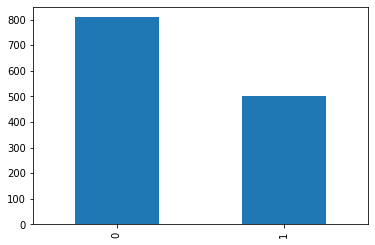

In [22]:
_ = titantic_passengers.survived.value_counts().plot.bar()

As we can see from this figure, we can hypothesize that if we had gone on the Titanic we may have been more than likely than not to have died, since more than half of the total number of passengers perished. This is not that exciting analysis and does not reveal who might have had a better chance of survival.

### Analysis based on variables

In this section we will do a little more specific predictions but with only one column that the outcome may be due to.

#### Gender

Let's look at the distribution based on gender:

In [23]:
titantic_passengers.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

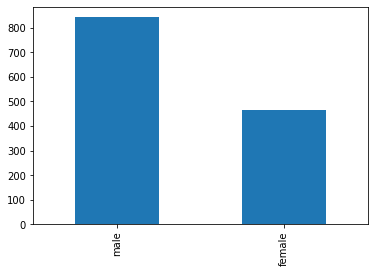

In [24]:
_ = titantic_passengers.sex.value_counts().plot.bar()

We can see that in general there were almost twice as many men as women. Let's check the distribution of survival rates based on gender:

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

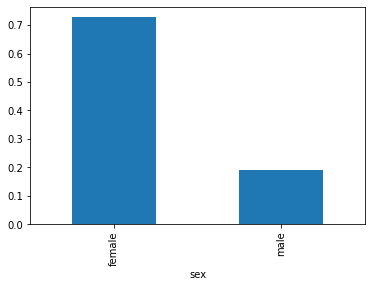

In [25]:
survived_by_gender = titantic_passengers.groupby('sex').survived.mean()
_ = survived_by_gender.plot.bar()
survived_by_gender

#### Age

Let's look at the distribution based on age:

(98,)

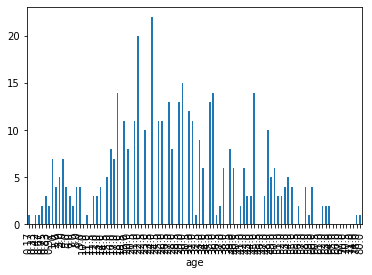

In [26]:
survived_by_age = titantic_passengers.groupby('age').survived.sum()
_ = survived_by_age.plot.bar()
survived_by_age.shape

As you can see, there are quite a few values that make the plot impossible to read. How many unique values occur in our age distribution (see the shape output above)?

In [27]:
num_unique_ages_in_distribution = titantic_passengers.age.nunique()
num_unique_ages_in_distribution

98

To be able to do a better analysis, we can apply some age categorisations. For example, we can add a column in the dataset that categorises a passenger as a child or not. The next code cell adds this column to the original dataset, where we define a child as being a person under 18 years old:

In [28]:
titantic_passengers['age_range'] = pd.cut(titantic_passengers.age, [0, 15, 80], labels=['child', 'adult'])
titantic_passengers.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_range
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1st,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child
2,1st,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult


Now we can plot the proportion of adults and children who survived:

age_range
child    0.573913
adult    0.387755
Name: survived, dtype: float64

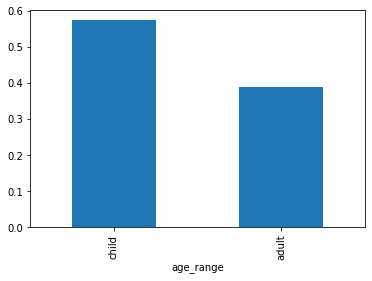

In [29]:
survived_by_age = titantic_passengers.groupby('age_range').survived.mean()
_ = survived_by_age.plot.bar()
survived_by_age

We could continue exploring all of the different features in the dataset like this, but instead we will do something a bit more interesting by building a classifier using decision trees.

### Decision Trees

So far we have tried to identify what might have been crucial for survival. However, there are other ways to identify these features. What we are going to do is build a decision tree model with which we can the use to make predictions.

First of all, we need to do some data cleaning in order to build our model correctly. By running the `info()` function we can see what columns have missing (null) cells:

In [30]:
titantic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   object  
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_range  1046 non-null   category
dtypes: category(1), float64(3), int64(3), object(8)
memory usage: 144.7+ KB


From the output, we can see that there is actually quite a lot missing. However we will ignore some of the incomplete columns in our analysis, and fix the ones we need to keep.


In this case, we need to fix out `age` and `fare` columns and we can do that by filling the null values with values fitting the mean values of the column. This is called **mean imputation**.

> "*Mean imputation* is the replacement of a missing observation with the mean of the non-missing observations for that variable."

Imputing the mean preserves the mean in the original data. If the missing data is missing completely at random, this ensure that the estimate of the mean remains unbiased. Also, by imputing the mean, you are able to preserve the full sample size, otherwise one may have to drop those rows with missing data. To understand this, let's compare in the original data the age column before and after imputation:

In [32]:
pd.DataFrame({
    "original": titantic_passengers.age.describe(),
    "imputed": titantic_passengers.age.fillna(titantic_passengers.age.mean()).describe()
})

,original,imputed
count,1046.000000,1309.000000
mean,29.881138,29.881138
std,14.413493,12.883193
min,0.170000,0.170000
25%,21.000000,22.000000
50%,28.000000,29.881138
75%,39.000000,35.000000
max,80.000000,80.000000


You should observe that the total count of the data is increased in the imputed column, because we fill those `NaN` values with the mean of the column. At the same time, we can see that most of the summary features of the column remain unchanged (mean, min, and max are all preseved).

*Mean imputation is not without its issues, but for the purposes of this exercise we will not worry about that.*

Run the following cell to impute the `age` and `fare` columns and modify the `titantic_passengers` DataFrame:

In [33]:
titantic_passengers.age = titantic_passengers.age.fillna(titantic_passengers.age.median())
titantic_passengers.fare = titantic_passengers.fare.fillna(titantic_passengers.fare.median())
titantic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   object  
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1309 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1309 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_range  1046 non-null   category
dtypes: category(1), float64(3), int64(3), object(8)
memory usage: 144.7+ KB


Our decision tree model from `sklearn` needs all of the input data to be encoded numerically. This means that the categorical information that is not already encoded as numbers need to also be converted. The following line of code converts the `sex` column into 0 for female and 1 for male, adding a new column `sex_male` to support this encoding.

In [34]:
titantic_passengers = pd.get_dummies(titantic_passengers, columns=['sex'], drop_first=True)
titantic_passengers

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_range,sex_male
0,1st,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,0
1,1st,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child,1
2,1st,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child,0
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,1
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1st,0,"Zabour, Miss. Hileni",14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,child,0
1305,1st,0,"Zabour, Miss. Thamine",28.00,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,0
1306,1st,0,"Zakarian, Mr. Mapriededer",26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,1
1307,1st,0,"Zakarian, Mr. Ortin",27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,1


You should notice that we now have a new column called `sex_male` with a numerical representation in it. Now we can drop the parts of the table we are no longer interested in:

In [35]:
survived_data = titantic_passengers.survived  # save this for training later
titantic_passengers = titantic_passengers[['sex_male', 'fare', 'age', 'sibsp']]
titantic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex_male  1309 non-null   uint8  
 1   fare      1309 non-null   float64
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
dtypes: float64(2), int64(1), uint8(1)
memory usage: 32.1 KB


In order to train our model we need to split the data into a training dataset and a test dataset. This means that we can train our classifier on the training dataset and the validate it after training using the test dataset that was kept separate during the training process.

We use components from the `sklearn` package to help us. We split two datasets: (1) The full set of features and (2) the target labels (survived or not). We split the data 75% / 25% since we wish to use as much data as possible to train the classifier but preserve enough data to validate the classifier after training.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(titantic_passengers, survived_data, test_size=0.25)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 981 rows
Our test data has 328 rows


Next, we train our `DecisionTreeClassifier` on the training data by asking `sklearn` to fit the features found in `X_train` (the 75% sample from the `titanic_passengers` data) against `y_train` (the 25% sample).

In [37]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_depth=3)

Now our decision tree has been created. We can test this by taking some test data that we split before into `X_test`. Note that the records in `X_test` were **not** used during the training process, which is why we can use it to validate our trained model.

The next cell takes the first 10 records (for convenience) as a sample table, then we run the `classifier.predict()` function on the sample and add it to the sample table for us to view the results:

In [38]:
sample = X_test.head(10)
sample

,sex_male,fare,age,sibsp
1003,1,23.2500,28.0,2
492,1,37.0042,1.0,0
215,1,113.2750,58.0,0
755,1,8.0500,17.0,2
176,0,51.8625,28.0,1
938,1,7.8542,18.0,1
370,0,30.0000,25.0,1
303,1,75.2500,64.0,1
1089,1,9.2250,20.0,0
266,1,26.5500,56.0,0


In [39]:
sample['survived'] = classifier.predict(sample)
sample

,sex_male,fare,age,sibsp,survived
1003,1,23.2500,28.0,2,0
492,1,37.0042,1.0,0,1
215,1,113.2750,58.0,0,0
755,1,8.0500,17.0,2,0
176,0,51.8625,28.0,1,1
938,1,7.8542,18.0,1,0
370,0,30.0000,25.0,1,1
303,1,75.2500,64.0,1,0
1089,1,9.2250,20.0,0,0
266,1,26.5500,56.0,0,0


How well do you think the model makes it's predicted classifications?

Even though we can see the effects by running some data through the classifer to view the predicted outcomes, we cannot see how the decision tree model makes its decisions. We can visualize the model we trained.

Run the following cell to visualize our classifier:

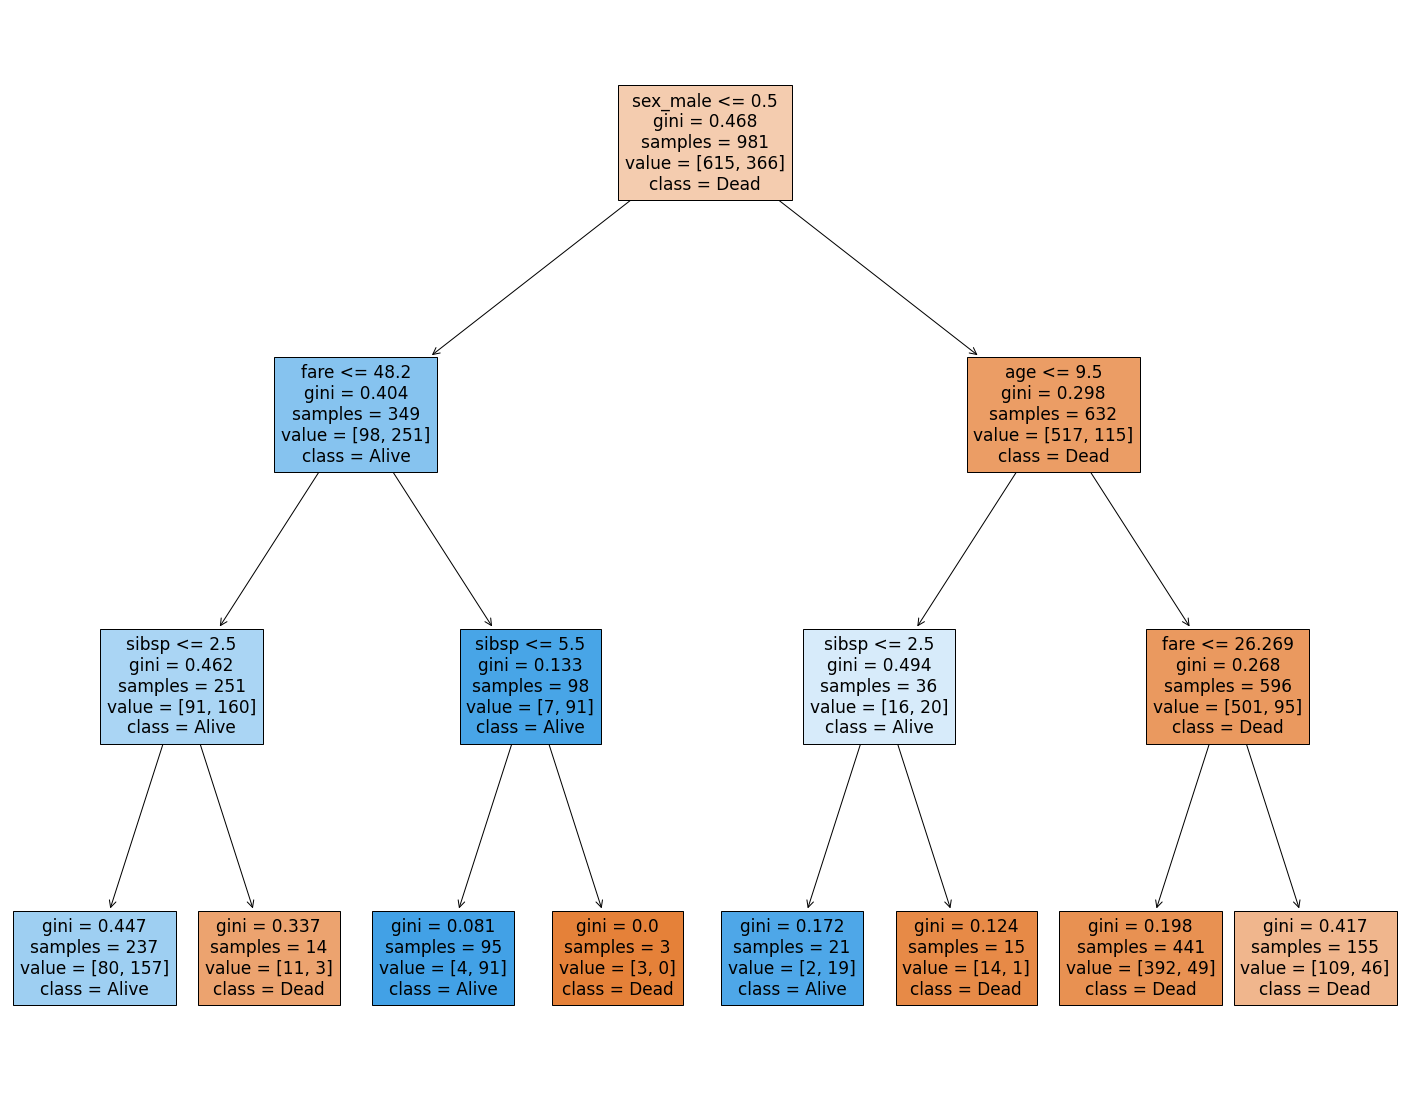

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=X_train.columns,  
                   class_names=['Dead', 'Alive'],
                   filled=True)

Take a look at the decision tree that was created (ignore the variables that we have not discussed such as `gini`, `samples`, `value`). What do you think about how the decision tree has logically rationalised the selection of survivors?